In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
path_to_preprocessed_data = "../../data/preprocessed_classification.csv"
data = pd.read_csv(path_to_preprocessed_data, sep=";")

In [3]:
data.sample(10)

,CALI,RMED,RDEP,GR,PEF,RHOB,NPHI,DTC,WELL,DEPTH_MD,...,PEF_window_max,RHOB_window_mean,RHOB_window_min,RHOB_window_max,NPHI_window_mean,NPHI_window_min,NPHI_window_max,DTC_window_mean,DTC_window_min,DTC_window_max
596052,0.597701,-0.102827,-0.310057,0.020668,-0.220738,0.384737,0.471805,0.463381,31/2-9,1188.497084,...,-0.131182,0.164772,-0.086556,0.384737,0.365878,0.265500,0.471805,0.696470,0.463381,0.886456
397289,-0.615026,0.092655,-0.093656,-1.400126,-0.260013,0.905670,0.373919,-1.120156,25/7-2,3086.304000,...,-0.260013,0.938289,0.905670,0.978446,0.373919,0.373919,0.373919,-1.131110,-1.164399,-1.115928
233781,1.103856,-0.144164,-0.412265,0.463184,-0.272994,-0.802270,0.340533,0.784595,25/2-13 T4,1855.936000,...,-0.266331,-0.818123,-0.826634,-0.802270,0.340533,0.340533,0.340533,0.855230,0.784595,0.928749
1137930,0.789231,-0.274452,-0.178899,0.871136,0.658320,-0.917312,1.078195,1.245839,35/9-6 S,2093.296000,...,0.658320,-0.951242,-1.003326,-0.911716,1.127517,1.064110,1.242822,1.235773,1.223934,1.245839
914082,1.247401,-0.056152,-0.261842,-0.155486,-0.073259,-0.672744,-0.732570,1.212528,34/7-21,1412.638000,...,-0.068749,-0.641875,-0.672744,-0.616303,-0.732570,-0.732570,-0.732570,1.211663,1.210727,1.212528
351601,0.664943,-0.317851,-0.297832,0.005134,-0.653607,-0.708779,-0.002261,0.859788,25/5-4,1315.552305,...,-0.653607,-0.691321,-0.708779,-0.672837,-0.002261,-0.002261,-0.002261,0.852033,0.842818,0.860489
450516,0.975224,-0.101867,-0.073404,-0.197816,-0.062085,-0.220200,0.060250,0.825550,26/4-1,1055.264199,...,-0.062085,-0.220200,-0.220200,-0.220200,0.060250,0.060250,0.060250,0.888845,0.825550,0.992634
1101329,0.401599,-0.154330,-0.147843,-0.439505,-0.597816,-1.182452,1.154700,0.364936,35/8-6 S,2090.014800,...,-0.141454,-1.270302,-1.371296,-1.182452,0.678719,0.385561,1.154700,0.364936,0.364936,0.364936
1088110,-0.108766,-0.397281,-0.578378,-0.887958,-0.236673,0.554988,0.381923,0.045473,35/4-1,3603.508000,...,-0.059639,0.542616,0.517455,0.560635,0.381923,0.381923,0.381923,0.030368,0.019438,0.045473
277961,-0.090114,-0.146796,-0.154321,0.363260,-0.347121,0.392203,1.164659,-0.154261,25/2-7,2467.722001,...,-0.231374,0.401725,0.378914,0.423832,0.960971,0.776349,1.164659,-0.174080,-0.206782,-0.141929


In [4]:
data.describe()

,CALI,RMED,RDEP,GR,PEF,RHOB,NPHI,DTC,DEPTH_MD,FORCE_2020_LITHOFACIES_LITHOLOGY,...,PEF_window_max,RHOB_window_mean,RHOB_window_min,RHOB_window_max,NPHI_window_mean,NPHI_window_min,NPHI_window_max,DTC_window_mean,DTC_window_min,DTC_window_max
count,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,...,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06
mean,1.303184e-15,1.030647e-15,-2.743804e-18,1.051368e-17,1.332495e-02,1.046622e-15,-2.326617e-15,5.139360e-17,2.184087e+03,1.953153e+00,...,1.035990e-01,-2.967013e-06,-9.355488e-02,9.544924e-02,-2.457521e-06,-1.089291e-01,1.097847e-01,-7.545085e-07,-6.565835e-02,6.516039e-02
std,9.988426e-01,9.974144e-01,1.000000e+00,1.000000e+00,9.208820e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.971821e+02,1.541950e+00,...,1.113709e+00,9.898383e-01,1.000700e+00,9.984561e-01,9.878455e-01,9.940762e-01,1.003761e+00,9.956305e-01,1.003618e+00,9.948808e-01
min,-7.462406e+00,-1.876843e+00,-2.136301e+00,-4.602150e+00,-8.007858e+00,-1.301881e+01,-8.286251e+00,-7.766647e+00,1.360860e+02,0.000000e+00,...,-5.556831e+00,-1.188388e+01,-1.301881e+01,-1.026993e+01,-7.845607e+00,-8.286251e+00,-7.438432e+00,-7.046587e+00,-7.766647e+00,-6.741822e+00
25%,-7.017227e-01,-2.719297e-01,-3.630855e-01,-6.273965e-01,-3.613604e-01,-6.152636e-01,-4.707456e-01,-7.884591e-01,1.418597e+03,1.000000e+00,...,-3.085633e-01,-6.121818e-01,-6.832467e-01,-5.496414e-01,-4.650453e-01,-5.876767e-01,-3.754293e-01,-7.876419e-01,-8.527399e-01,-7.263865e-01
50%,9.273592e-02,-1.231937e-01,-1.406851e-01,-4.830334e-02,-1.760620e-02,-2.187092e-02,1.189754e-01,6.335813e-02,2.076605e+03,2.000000e+00,...,0.000000e+00,-2.030626e-02,-9.024680e-02,8.801540e-02,1.189754e-01,8.529977e-02,1.847040e-01,6.284967e-02,-1.939931e-02,1.106411e-01
75%,6.968539e-01,4.737019e-03,1.526643e-03,5.561855e-01,2.134223e-01,7.058322e-01,5.386202e-01,7.591303e-01,2.864393e+03,2.000000e+00,...,2.458624e-01,7.031064e-01,6.150572e-01,8.048640e-01,5.386202e-01,4.418927e-01,6.318094e-01,7.571416e-01,7.010994e-01,8.174245e-01
max,1.981211e+01,1.378428e+02,9.069571e+01,3.062213e+01,7.707675e+01,8.670923e+00,1.000353e+01,6.180685e+00,5.436632e+03,1.100000e+01,...,7.707675e+01,8.394446e+00,8.106544e+00,8.670923e+00,9.506040e+00,8.792460e+00,1.000353e+01,5.881281e+00,5.647461e+00,6.180685e+00


## Wells

In [5]:
wells = list(set(data["WELL"]))
print(wells)
print("Number of wells: {}".format(len(wells)))

['25/4-5', '34/11-1', '35/4-1', '34/10-35', '35/9-6 S', '25/2-7', '16/7-4', '15/9-17', '34/10-21', '25/6-3', '34/10-19', '32/2-1', '31/2-1', '16/1-2', '31/3-3', '15/9-13', '33/9-1', '25/5-4', '35/9-5', '31/3-4', '34/4-10 R', '31/4-10', '25/11-19 S', '31/2-7', '16/11-1 ST3', '31/2-8', '25/2-14', '31/2-9', '34/10-33', '30/6-5', '30/3-5 S', '29/6-1', '34/8-1', '31/3-1', '31/2-19 S', '35/11-7', '25/3-1', '16/10-5', '35/11-15 S', '25/8-7', '33/5-2', '26/4-1', '35/11-10', '15/9-15', '34/7-21', '17/11-1', '31/5-4 S', '31/6-8', '34/5-1 S', '16/5-3', '34/2-4', '25/9-1', '30/3-3', '34/12-1', '34/11-2 S', '35/9-10 S', '33/9-17', '34/8-3', '35/11-6', '16/1-6 A', '16/2-11 A', '34/7-20', '16/10-1', '25/6-2', '35/11-1', '25/11-15', '35/8-6 S', '35/12-1', '16/8-1', '35/3-7 S', '34/7-13', '25/6-1', '33/6-3 S', '16/10-3', '16/4-1', '35/11-12', '16/2-16', '25/2-13 T4', '16/10-2', '31/4-5', '31/6-5', '35/11-13', '34/3-1 A', '25/7-2', '16/2-6', '25/11-5', '16/7-5', '35/11-11', '34/8-7 R', '7/1-2 S', '25/8-

## Lithology - Target variable

In [6]:
data["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([ 2,  0,  1,  5,  9,  3,  8,  4,  6, 10,  7, 11])

In [7]:
lithology_keys = {0: 'Sandstone',
                 1: 'Sandstone/Shale',
                 2: 'Shale',
                 3: 'Marl',
                 4: 'Dolomite',
                 5: 'Limestone',
                 6: 'Chalk',
                 7: 'Halite',
                 8: 'Anhydrite',
                 9: 'Tuff',
                 10: 'Coal',
                 11: 'Basement'}

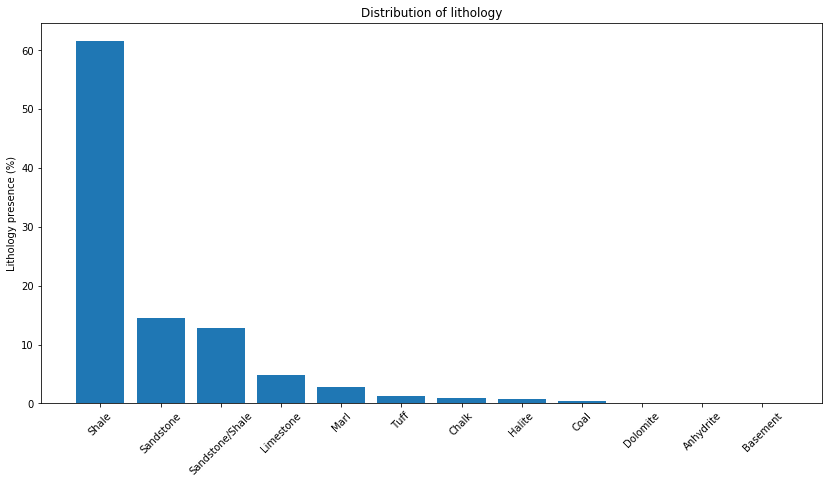

In [8]:
lithology_counts = data["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()
lithologies = []
fraction_present = []
N = len(data.index)
for item in lithology_counts.iteritems():
    lithologies.append(lithology_keys[item[0]])
    fraction_present.append(float(item[1])/N*100)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
plt.title("Distribution of lithology")
ax.bar(x=np.arange(len(lithologies)), height=fraction_present)
ax.set_xticklabels(lithologies, rotation=45)
ax.set_xticks(np.arange(len(lithologies)))
ax.set_ylabel("Lithology presence (%)");


In [9]:
lithology_counts_readable = pd.Series({lithology_keys[k]: v for k, v in lithology_counts.items()})
lithology_counts_readable

Shale              720803
Sandstone          168937
Sandstone/Shale    150455
Limestone           56320
Marl                33329
Tuff                15245
Chalk               10513
Halite               8213
Coal                 3820
Dolomite             1688
Anhydrite            1085
Basement              103
dtype: int64

## Explanatory variables

In [10]:
variables = data.columns.values
target_variable = "FORCE_2020_LITHOFACIES_LITHOLOGY"
explanatory_variables = [var for var in variables if var not in [target_variable, "WELL"]]
pd.Series(explanatory_variables, index=None)

0                 CALI
1                 RMED
2                 RDEP
3                   GR
4                  PEF
5                 RHOB
6                 NPHI
7                  DTC
8             DEPTH_MD
9        CALI_gradient
10       RMED_gradient
11       RDEP_gradient
12         GR_gradient
13        PEF_gradient
14       RHOB_gradient
15       NPHI_gradient
16        DTC_gradient
17    CALI_window_mean
18     CALI_window_min
19     CALI_window_max
20    RMED_window_mean
21     RMED_window_min
22     RMED_window_max
23    RDEP_window_mean
24     RDEP_window_min
25     RDEP_window_max
26      GR_window_mean
27       GR_window_min
28       GR_window_max
29     PEF_window_mean
30      PEF_window_min
31      PEF_window_max
32    RHOB_window_mean
33     RHOB_window_min
34     RHOB_window_max
35    NPHI_window_mean
36     NPHI_window_min
37     NPHI_window_max
38     DTC_window_mean
39      DTC_window_min
40      DTC_window_max
dtype: object

### Distribution of explanatory variables and correlation plots

In [11]:
original_variables = explanatory_variables[0:9] + [target_variable, "WELL"]
og_exp_vars = [var for var in original_variables if var not in [target_variable, "WELL"]]
original_data = data[original_variables]
#sample_original_data = original_data.sample(10000)
#sns.pairplot(sample_original_data, hue=target_variable, vars=og_exp_vars)

### Plot well-logs for a given well

https://towardsdatascience.com/displaying-lithology-data-using-python-and-matplotlib-58b4d251ee7a for the below lithology plot

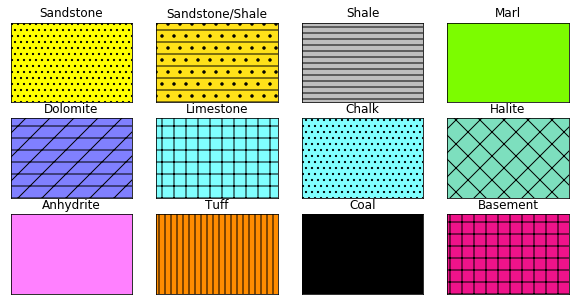

In [49]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

In [50]:
well_data = original_data[original_data["WELL"] == wells[42]]

In [51]:
lithology_numbers = {0: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 1: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 2: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 3: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 4: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 5: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 6: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 7: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 8: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 9: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 10: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 11: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

1402
567
3722
336
0
83
0
0
0
0
96
0


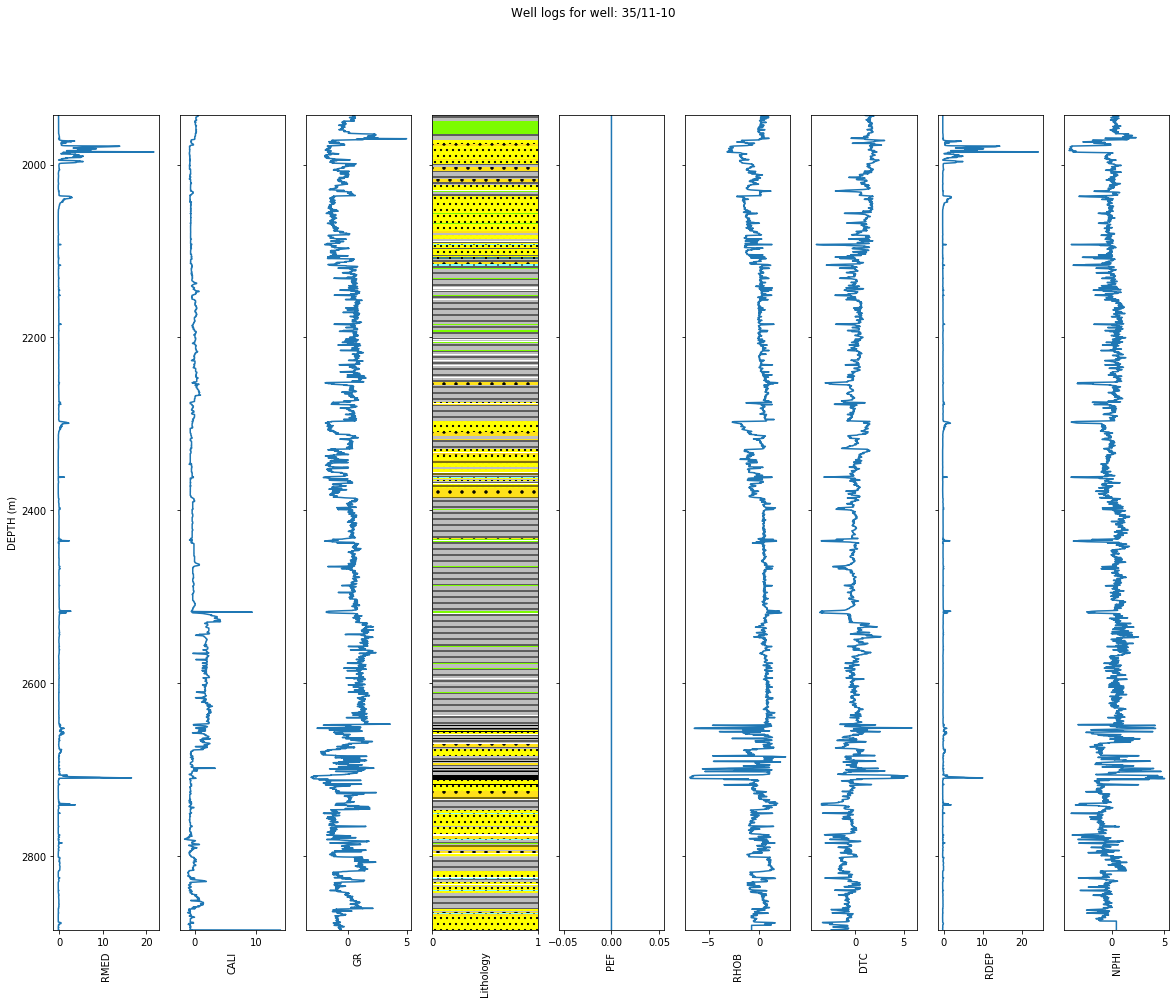

In [52]:
fig, axs = plt.subplots(1, len(well_data.columns)-2, figsize=(20,15), sharey=True)
plt.suptitle("Well logs for well: {}".format(well_data["WELL"].unique()[0]))

for ic, col in enumerate(set(well_data.columns)-set(["DEPTH_MD", "WELL"])):
    if col == target_variable:
        # plot color depending on lithology - fix this 
        #axs[ic].plot(well_data[target_variable], well_data["DEPTH_MD"], color="black", linewidth=0.5)
        axs[ic].set_xlabel("Lithology", rotation=90)
        axs[ic].set_xlim(0, 1)
        
        for key in lithology_numbers.keys():
            color = lithology_numbers[key]['color']
            hatch = lithology_numbers[key]['hatch']
            axs[ic].fill_betweenx(well_data["DEPTH_MD"], 0, 1, 
                                 where=(well_data[target_variable] == key), facecolor=color, hatch=hatch)
            print((well_data[target_variable] == key).sum())
        axs[ic].set_xticks([0, 1])
        axs[ic].grid(which='major', color='lightgrey', linestyle='-')
        axs[ic].xaxis.set_ticks_position("bottom")
        axs[ic].xaxis.set_label_position("bottom")
        continue
    
    axs[ic].plot(well_data[col], well_data["DEPTH_MD"])
    axs[ic].set_xlabel(col, rotation=90)
    
    
axs[0].set_ylim(well_data["DEPTH_MD"].values[-1], well_data["DEPTH_MD"].values[0])
axs[0].set_ylabel("DEPTH (m)");

## Correlation plots, based on lithology

In [53]:
data['LITH'] = data[target_variable].map(lithology_keys)


array(['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite',
       'Basement'], dtype=object)

### RMED vs CALI for the different lithologies in the dataset

TODO: do for all combinations

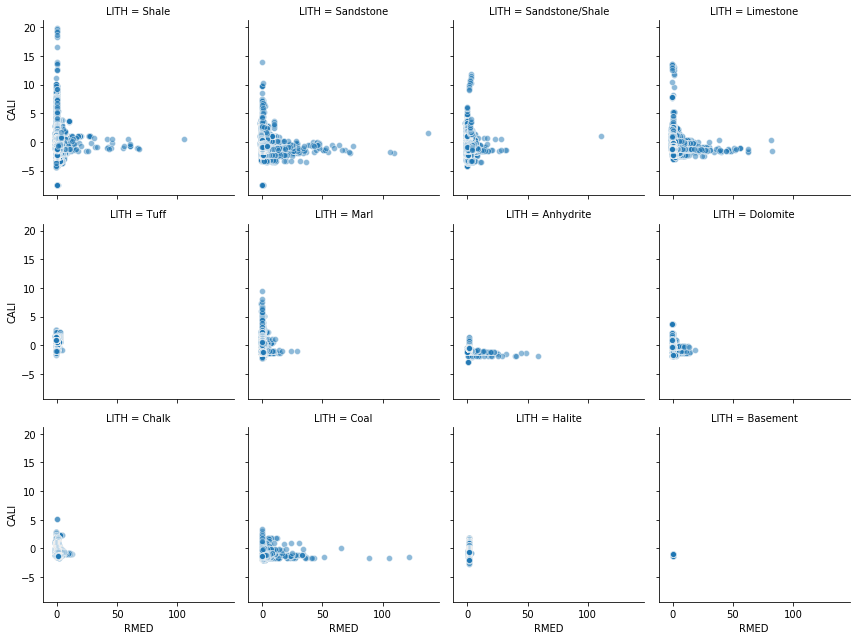

In [54]:
g = sns.FacetGrid(data, col="LITH", col_wrap=4)
g.map(sns.scatterplot, "RMED", "CALI", alpha=0.5)

In [55]:
data.columns

Index(['CALI', 'RMED', 'RDEP', 'GR', 'PEF', 'RHOB', 'NPHI', 'DTC', 'WELL',
       'DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'CALI_gradient',
       'RMED_gradient', 'RDEP_gradient', 'GR_gradient', 'PEF_gradient',
       'RHOB_gradient', 'NPHI_gradient', 'DTC_gradient', 'CALI_window_mean',
       'CALI_window_min', 'CALI_window_max', 'RMED_window_mean',
       'RMED_window_min', 'RMED_window_max', 'RDEP_window_mean',
       'RDEP_window_min', 'RDEP_window_max', 'GR_window_mean', 'GR_window_min',
       'GR_window_max', 'PEF_window_mean', 'PEF_window_min', 'PEF_window_max',
       'RHOB_window_mean', 'RHOB_window_min', 'RHOB_window_max',
       'NPHI_window_mean', 'NPHI_window_min', 'NPHI_window_max',
       'DTC_window_mean', 'DTC_window_min', 'DTC_window_max', 'LITH'],
      dtype='object')

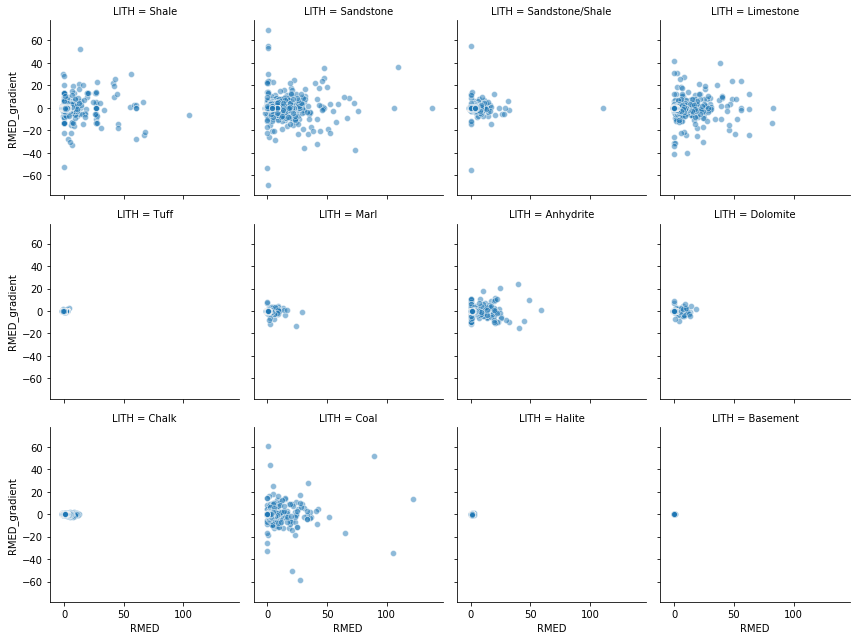

In [57]:
g = sns.FacetGrid(data, col="LITH", col_wrap=4)
g.map(sns.scatterplot, "RMED", "RMED_gradient", alpha=0.5)